<a href="https://colab.research.google.com/github/AshSama12/Bike-Sharing-Dataset-Analysis/blob/main/ML_LAB02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EC9630 Machine Learning -Laboratory 1

Task : Linear Regression

Name :Samaranayake T.A.G.A.M

Reg No : 2020/E/139

Date : 19.07.2024

Time : 8.00 AM

In [4]:
# https://www.kaggle.com/learn/intro-to-programming
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/
# Path to the ZIP file in Google Drive

zip_file_path = '/content/bike+sharing+dataset.zip'
extracted_path = '/content/dataset '

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [6]:
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/

import pandas as pd

# Load the dataset
file_path = '/content/dataset /bike+sharing+dataset/hour.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [7]:
# Check for missing values
print(data.isnull().sum())

# Select relevant features
features = ['temp', 'hum', 'windspeed']
target = 'cnt'

# Optionally, convert categorical features using one-hot encoding
data = pd.get_dummies(data, columns=['season', 'weathersit'], drop_first=True)


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
# https://www.kaggle.com/learn/data-cleaning
# Check for missing values

print(data.isnull().sum())

# Display current column names
print(data.columns)

# Adjust features to include encoded columns
features = ['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
            'weathersit_2', 'weathersit_3', 'weathersit_4']
target = 'cnt'

instant         0
dteday          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
season_2        0
season_3        0
season_4        0
weathersit_2    0
weathersit_3    0
weathersit_4    0
dtype: int64
Index(['instant', 'dteday', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')


In [9]:
#https://www.kaggle.com/code/ryanholbrook/creating-features

from sklearn.model_selection import train_test_split

# Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
#Linear Regression SCIKIT learn - https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Predict on test data
y_pred = model.predict(X_test)


In [12]:
#https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 112.74775977542018, MSE: 22681.408454074743, RMSE: 150.60348088299534


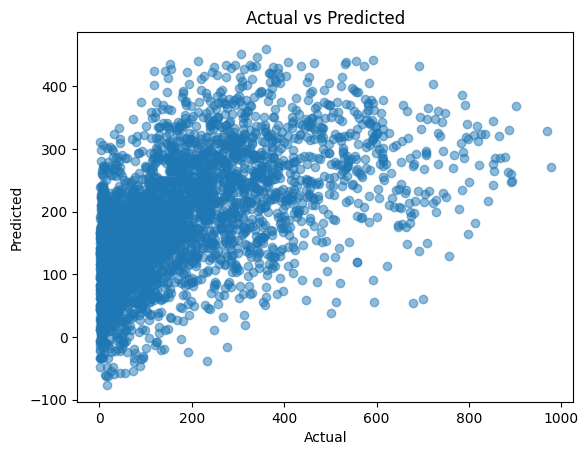

In [13]:
#Data Visualization - https://www.kaggle.com/learn/data-visualization
# Plot actual vs predicted

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

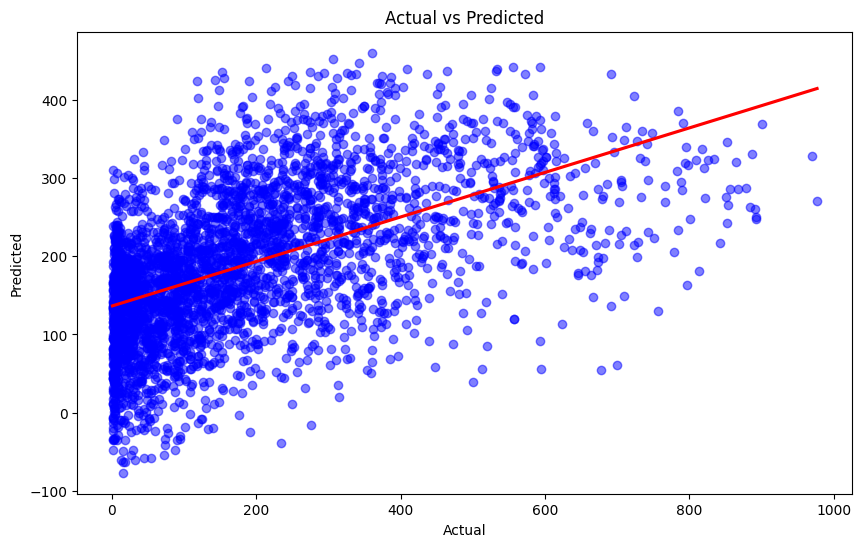

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={"alpha": 0.5, "color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [17]:
#https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

from sklearn.linear_model import Lasso, Ridge

# Lasso (L1 Regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


In [18]:
# Ridge (L2 Regularization)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [19]:
# Evaluate Lasso and Ridge
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Lasso MAE: {mae_lasso}, MSE: {mse_lasso}")
print(f"Ridge MAE: {mae_ridge}, MSE: {mse_ridge}")

Lasso MAE: 112.76985171208167, MSE: 22689.88317684272
Ridge MAE: 112.74696680217711, MSE: 22681.307307319737


In [20]:
# Analyze impact of regularization
print("Linear Regression Coefficients:", model.coef_)
print("Lasso Coefficients:", lasso.coef_)
print("Ridge Coefficients:", ridge.coef_)

Linear Regression Coefficients: [ 451.69346249 -288.46005399   27.38895437   -0.9276668   -40.97465619
   59.98272009   15.93964295   -2.96703588  123.83461732]
Lasso Coefficients: [ 444.73084547 -287.41323452   21.15662316    0.          -38.45027679
   59.73181587   15.27138452   -2.02649327    0.        ]
Ridge Coefficients: [ 451.46943616 -288.40140827   27.41803585   -0.87899564  -40.88924635
   60.00135042   15.92814994   -2.99019535  117.8926335 ]


        Feature      Linear       Lasso       Ridge
0          temp  451.693462  444.730845  451.469436
1           hum -288.460054 -287.413235 -288.401408
2     windspeed   27.388954   21.156623   27.418036
3      season_2   -0.927667    0.000000   -0.878996
4      season_3  -40.974656  -38.450277  -40.889246
5      season_4   59.982720   59.731816   60.001350
6  weathersit_2   15.939643   15.271385   15.928150
7  weathersit_3   -2.967036   -2.026493   -2.990195
8  weathersit_4  123.834617    0.000000  117.892633


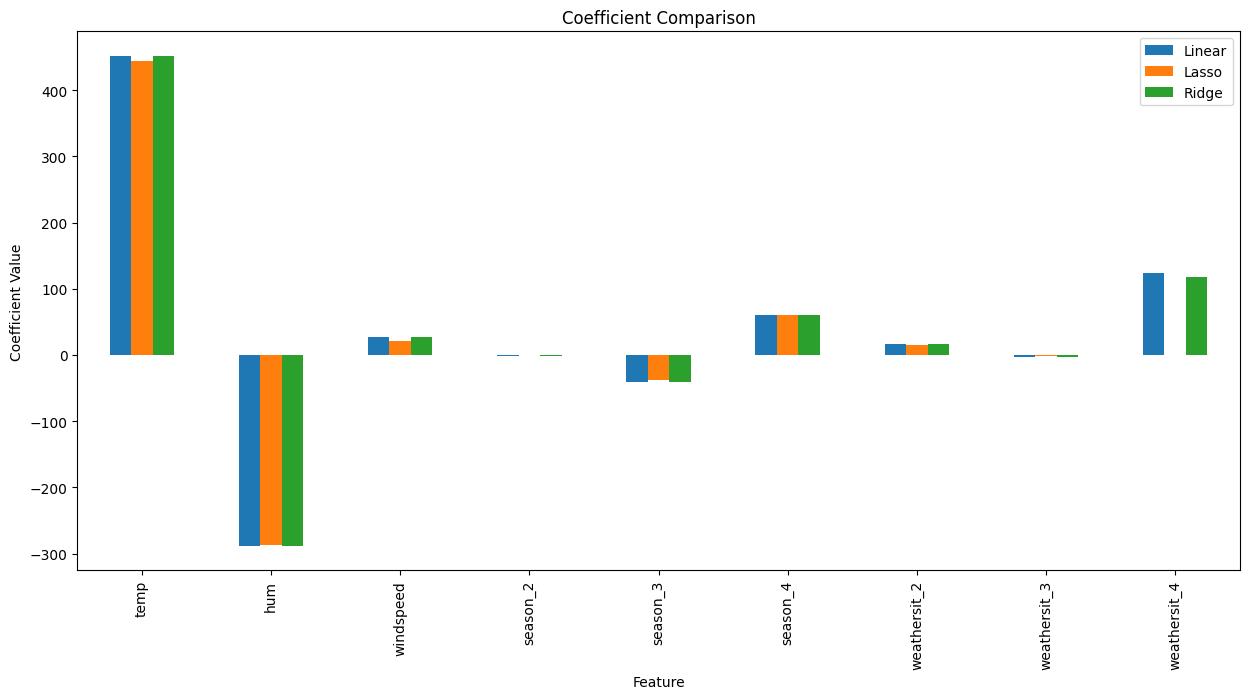

In [24]:
# Compare coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear': model.coef_,
    'Lasso': lasso.coef_,
    'Ridge': ridge.coef_
})

print(coefficients)

# Visualize coefficient comparison
coefficients.set_index('Feature').plot(kind='bar', figsize=(15, 7))
plt.title('Coefficient Comparison')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.show()

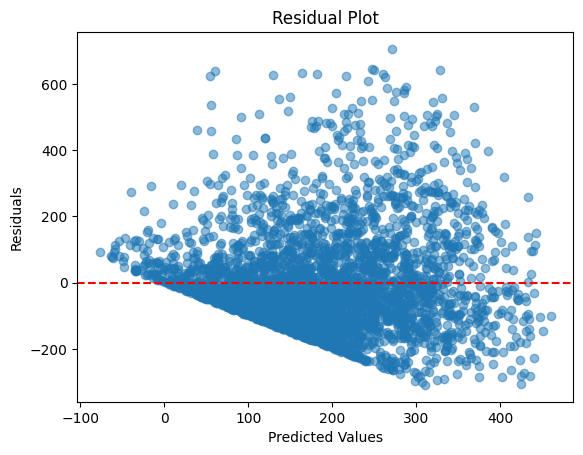

In [21]:
#Data Visualization - https://www.kaggle.com/learn/data-visualization
#Residuals Plot

residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


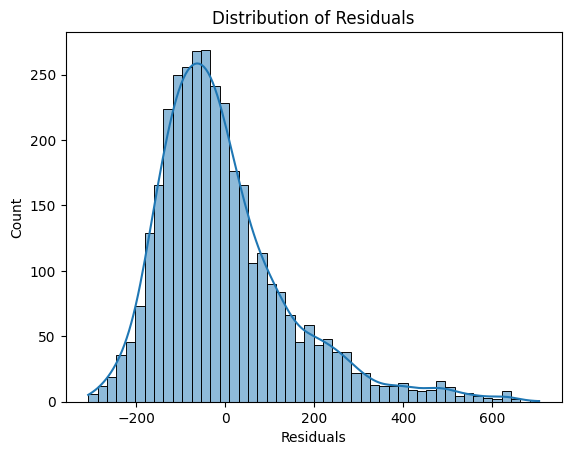

In [22]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


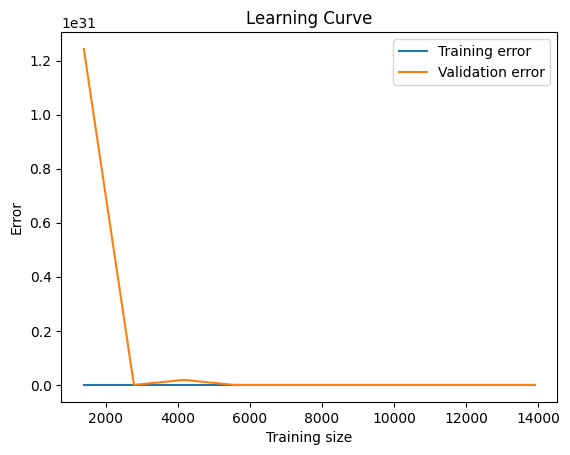

In [23]:
#Evaluation Score - https://scikit-learn.org/stable/modules/model_evaluation.html
#Learning Curve

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

train_errors = -train_scores.mean(axis=1)
test_errors = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, label='Training error')
plt.plot(train_sizes, test_errors, label='Validation error')
plt.ylabel('Error')
plt.xlabel('Training size')
plt.title('Learning Curve')
plt.legend()
plt.show()
